# Project: Movies - Development from 1960 to 2015


<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Investigate tmdb Data from 1960 to 2015 to get insights from genre Development and Popularity characteristics. Exploring which genres are popular overall and in different year intervalls. Furthermore check what the main characteristics of popluar movies are like rumtime, budget and revenue.

In [2]:
### Import all libaries used including magic words

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np

%matplotlib inline
mpl.rcParams['font.size'] = 12.0


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [3]:
### Read csv data and displays the columns infomation
df = pd.read_csv('tmdb-movies.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
### Explore Dataframe, display some rows
df.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

##### Dataframe has 21 columns with 10866 rows

### Data Cleaning:
Delete unnecesarry columns: There is no need for several columns like homepage, tageline to investigate the Data in relation to genre/popularity.

look for movie duplicates and NaN values to cleaning the Data properly. If possible fill NaN or drop it. Changing Dtype of release_year(int) to datetime.

In [5]:
### Drop unnecesarry columns like imbd_id, homepage, overview, tagline
drop_cols = ['imdb_id','homepage','overview','tagline', 'keywords','release_date', 'cast', 'production_companies']
df.drop(columns= drop_cols, inplace=True)

In [6]:
#### Count Duplicates
df.duplicated().sum()

1

In [7]:
#### Drop duplicates, Check for rows with atleast one NaN
df.drop_duplicates(inplace=True)
df.isnull().values.any()
df.isnull().sum().sum()

67

In [8]:
### Drop NaN: in Total there are 67 rows incomplete, so less than 1% of the whole Dataframe. Last check Data information
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10800 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10800 non-null  int64  
 1   popularity      10800 non-null  float64
 2   budget          10800 non-null  int64  
 3   revenue         10800 non-null  int64  
 4   original_title  10800 non-null  object 
 5   director        10800 non-null  object 
 6   runtime         10800 non-null  int64  
 7   genres          10800 non-null  object 
 8   vote_count      10800 non-null  int64  
 9   vote_average    10800 non-null  float64
 10  release_year    10800 non-null  int64  
 11  budget_adj      10800 non-null  float64
 12  revenue_adj     10800 non-null  float64
dtypes: float64(4), int64(6), object(3)
memory usage: 1.2+ MB


In [9]:
### Changing Release_year int to pandas Datetime. Reset index cause of dropped rows
df['release_year'] = pd.to_datetime(df['release_year'], format='%Y')
df.reset_index(inplace=True, drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10800 non-null  int64         
 1   popularity      10800 non-null  float64       
 2   budget          10800 non-null  int64         
 3   revenue         10800 non-null  int64         
 4   original_title  10800 non-null  object        
 5   director        10800 non-null  object        
 6   runtime         10800 non-null  int64         
 7   genres          10800 non-null  object        
 8   vote_count      10800 non-null  int64         
 9   vote_average    10800 non-null  float64       
 10  release_year    10800 non-null  datetime64[ns]
 11  budget_adj      10800 non-null  float64       
 12  revenue_adj     10800 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(5), object(3)
memory usage: 1.1+ MB


In Total 12 columns with 10800 rows to watch. Probably there is no use for id/director and original_title and can be dropped too. These columns were necessary to watch for duplicates. 

<a id='eda'></a>
## Exploratory Data Analysis

### Question 1: Which Genres are popular overall between 1960- 2015

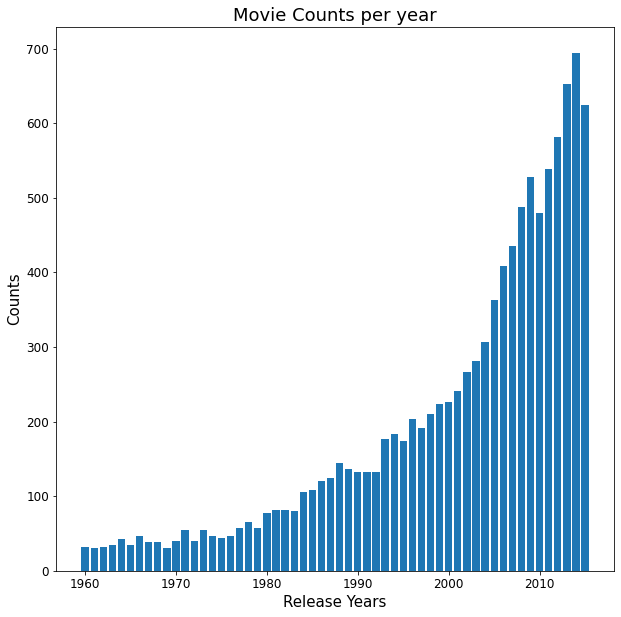

In [10]:
## How's is the Development of movie creation per year?
#First groupby release_year and count. Take one column.
totals_movie_pa = df.groupby('release_year').count()['id']
labels = totals_movie_pa.index.year
count = totals_movie_pa.values

## Plotting the Data as bars with matplotlib

fig, ax = plt.subplots(figsize=(10,10))
ax.bar(x=labels, height=count)
ax.set_xlabel('Release Years', fontsize=15)
ax.set_ylabel('Counts', fontsize=15)

plt.title('Movie Counts per year', fontsize=18);

In [11]:
### Range of max and min counts over the years
totals_movie_pa.max() - totals_movie_pa.min()

663

In [12]:
totals_movie_pa.head(1)

release_year
1960-01-01    32
Name: id, dtype: int64

In [13]:
totals_movie_pa.tail(1)

release_year
2015-01-01    624
Name: id, dtype: int64

The movie creation increases strongly over the years. It counts only 32 movies in 1960 and increased to 1950% to 2015, in total 624 movies.

### How is the distribution of Genres overall?

In [14]:
### making a copy of the main dataframe
df_main_genre = df.copy()

In [15]:
### Expecting that the first entry of the genre columns is the main Genre of the film
df_main_genre['genres'] = df_main_genre['genres'].apply(lambda x: x.split('|')[0])

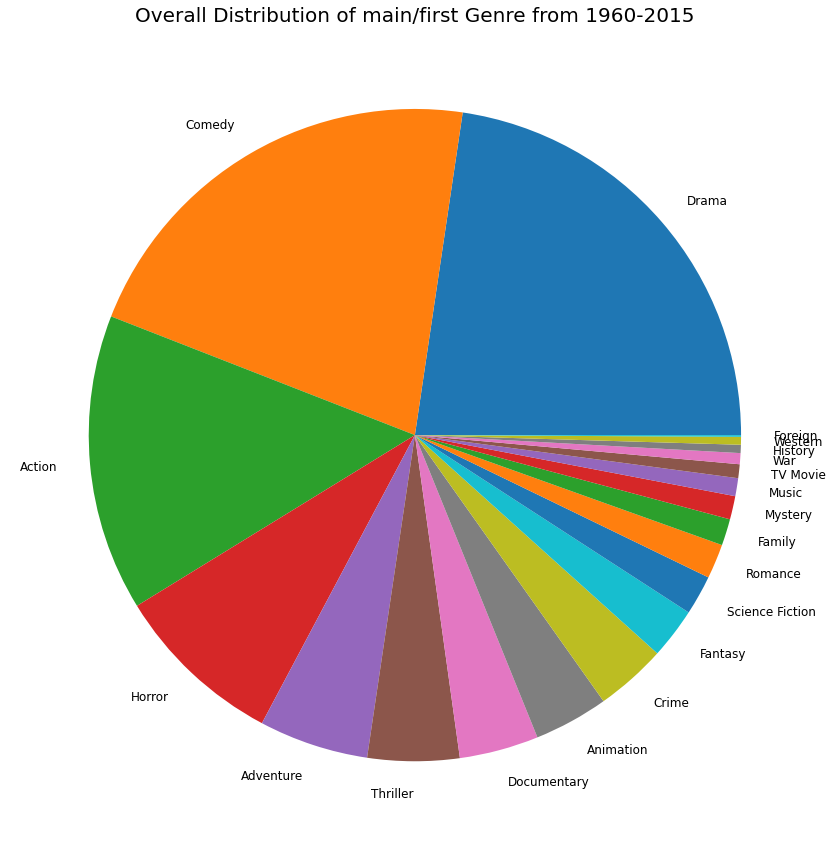

In [16]:
### Displaying the Data as a piechart

df_main_genre['genres'].value_counts().plot.pie(y=' ',figsize=(15,15)).set_ylabel('')
plt.title('Overall Distribution of main/first Genre from 1960-2015', fontsize=20);

#### The propotion of some movies are really small and a pie chart with proportions will be better. So displaying Values counts:

In [17]:
total_genre_counter = df_main_genre['genres'].value_counts()
total_genre_counter

Drama              2447
Comedy             2313
Action             1587
Horror              914
Adventure           586
Thriller            491
Documentary         424
Animation           398
Crime               380
Fantasy             272
Science Fiction     212
Romance             185
Family              142
Mystery             125
Music                96
TV Movie             74
War                  59
History              44
Western              42
Foreign               9
Name: genres, dtype: int64

In [18]:
total_movie = total_genre_counter.sum()
prop_genre = total_genre_counter / total_movie
prop_genre

Drama              0.226574
Comedy             0.214167
Action             0.146944
Horror             0.084630
Adventure          0.054259
Thriller           0.045463
Documentary        0.039259
Animation          0.036852
Crime              0.035185
Fantasy            0.025185
Science Fiction    0.019630
Romance            0.017130
Family             0.013148
Mystery            0.011574
Music              0.008889
TV Movie           0.006852
War                0.005463
History            0.004074
Western            0.003889
Foreign            0.000833
Name: genres, dtype: float64

In [19]:
""" Sum all movies under a total Count of 50 together. Remove all entries under 50 counts of the dataframe.
Append the sum of the < 50 sum to the dataframe.
"""
others_count = total_genre_counter[total_genre_counter < 50].sum()
new_entry = pd.Series(others_count, index=['Others'])
total_genre_counter = total_genre_counter[total_genre_counter > 50]
total_genre_counter_fix = total_genre_counter.append(new_entry)
total_genre_counter_fix

Drama              2447
Comedy             2313
Action             1587
Horror              914
Adventure           586
Thriller            491
Documentary         424
Animation           398
Crime               380
Fantasy             272
Science Fiction     212
Romance             185
Family              142
Mystery             125
Music                96
TV Movie             74
War                  59
Others               95
dtype: int64

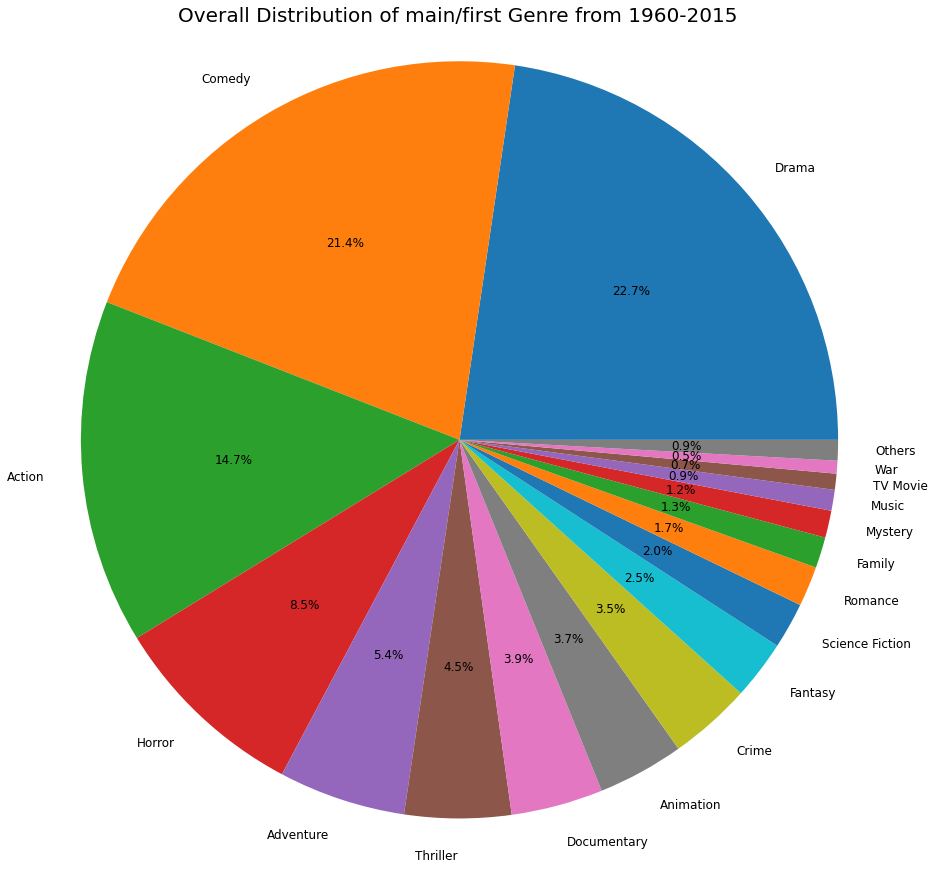

In [20]:
### Fixed Pie Chart plot with relative distributions of each genre

fig1, ax1 = plt.subplots(figsize=(15,15))
labels = total_genre_counter_fix.index
ax1.pie(total_genre_counter_fix, autopct='%1.1f%%', labels=labels)
ax1.axis('equal')
plt.title('Overall Distribution of main/first Genre from 1960-2015', fontsize=20);

### The film production companies are producing mostly Drama, Comedy and Action movies over all years.

In [21]:
""" For Comparision: If the genres of each movie is splitted and count separatly for each movie.
For Example movie ONE with the genres Action | Science Fiction | Animation will separeted in 3 different rows
with each Genre. So movie ONE will count as a action, Science Fiction and Animation movie
"""
df_genre_split = df.assign(genres=df.genres.str.split("|")).explode('genres')

In [22]:
df_genre_split.head(10)

,id,popularity,budget,revenue,original_title,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,5562,6.5,2015-01-01,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Adventure,5562,6.5,2015-01-01,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Science Fiction,5562,6.5,2015-01-01,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Thriller,5562,6.5,2015-01-01,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action,6185,7.1,2015-01-01,1.379999e+08,3.481613e+08
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Adventure,6185,7.1,2015-01-01,1.379999e+08,3.481613e+08
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Science Fiction,6185,7.1,2015-01-01,1.379999e+08,3.481613e+08
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Thriller,6185,7.1,2015-01-01,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure,2480,6.3,2015-01-01,1.012000e+08,2.716190e+08
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Science Fiction,2480,6.3,2015-01-01,1.012000e+08,2.716190e+08


In [23]:
### Value Count for each genre. How many "movies" are in the dataframe in comparison to the other pie chart
genre_big_split = df_genre_split['genres'].value_counts()
genre_big_split.sum()

26864

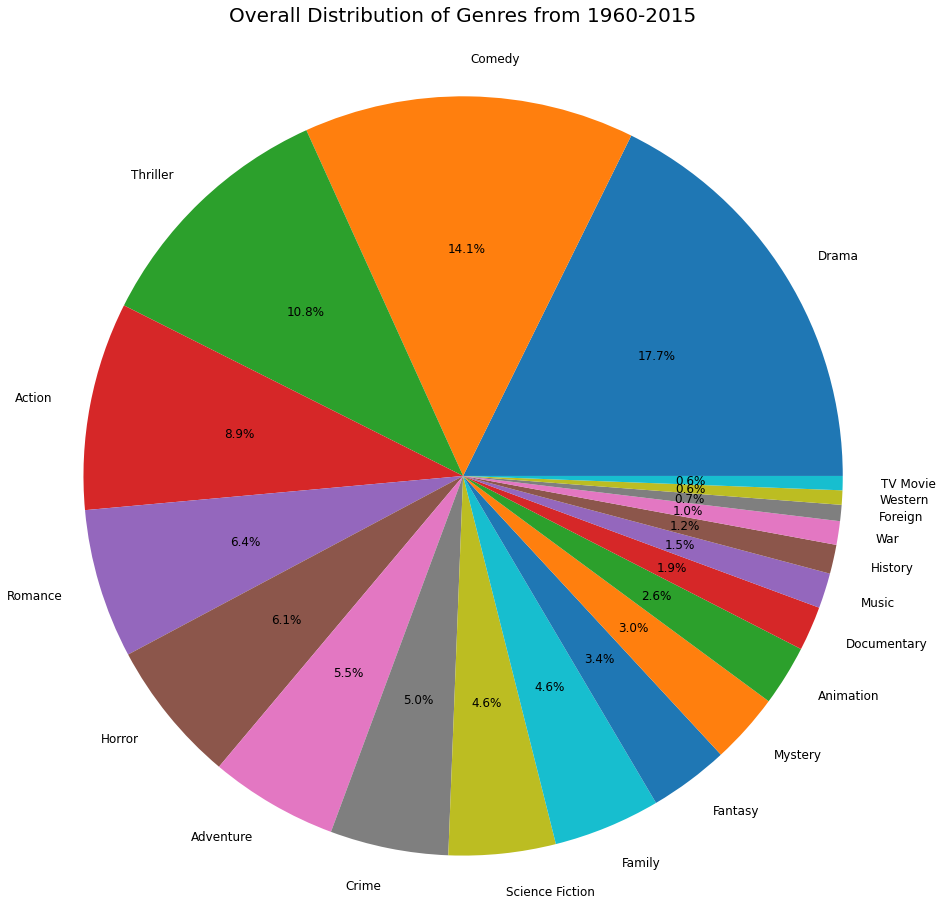

In [24]:
fig2, ax2 = plt.subplots(figsize=(15,15))
labels2 = genre_big_split.index
ax2.pie(genre_big_split, autopct='%1.1f%%', labels=labels2)
ax2.axis('equal')
plt.title('Overall Distribution of Genres from 1960-2015', fontsize=20, y=1.05);

##### Drama and Comedy movies are still the most produced movies. But this way of counting the genres with subgenres changes the distribution significantly. For example there are more Romance and Thriller movies in comparison to the other pie chart.

For further explorations I'll only take the main genre distribution.

### Which genres were most popular in which year?

In [25]:
### Grouping by Year and genre and count all genres for each year
df_year_gen = df_main_genre.groupby(['release_year','genres'],as_index=False).count().iloc[:,0:3]
df_year_gen.rename(columns={'id':'count'}, inplace=True)
df_year_gen.head(5)

,release_year,genres,count
0,1960-01-01,Action,8
1,1960-01-01,Adventure,2
2,1960-01-01,Comedy,7
3,1960-01-01,Crime,1
4,1960-01-01,Drama,5


In [26]:
### Find the most produced movie genre per Year
idx_best_gen = df_year_gen.groupby(['release_year'])['count'].transform(max) == df_year_gen['count']
df_year_gen[idx_best_gen]

,release_year,genres,count
0,1960-01-01,Action,8
9,1961-01-01,Comedy,8
21,1962-01-01,Drama,11
30,1963-01-01,Comedy,9
38,1964-01-01,Comedy,10
40,1964-01-01,Drama,10
51,1965-01-01,Drama,11
55,1966-01-01,Action,11
72,1967-01-01,Comedy,11
88,1968-01-01,Drama,10


As expected there are only the three most produced genres Drama, Comedy and Action listed. But the last 25 years were dominated by Drama and Comedy movies.

In [27]:
### Setting Year as index and groupby genres. For a better visualization take the sum for 5 year intervalls.
df_split_gen_pa = df_year_gen.set_index('release_year').groupby('genres').resample('5A', label='right').sum()
df_split_gen_pa.head(30)

count
genres    release_year       
Action    1960-12-31        8
          1965-12-31       21
          1970-12-31       37
          1975-12-31       49
          1980-12-31       54
          1985-12-31       71
          1990-12-31      115
          1995-12-31      172
          2000-12-31      160
          2005-12-31      244
          2010-12-31      312
          2015-12-31      344
Adventure 1960-12-31        2
          1965-12-31       18
          1970-12-31       13
          1975-12-31       14
          1980-12-31       20
          1985-12-31       44
          1990-12-31       42
          1995-12-31       44
          2000-12-31       59
          2005-12-31       91
          2010-12-31      122
          2015-12-31      117
Animation 1963-12-31        1
          1968-12-31        9
          1973-12-31        7
          1978-12-31        3
          1983-12-31        5
          1988-12-31       13

In [28]:
### Select only the most popular movie genres(Drama, Action and Comedy)
best_genres_overall = df_year_gen[idx_best_gen]['genres'].unique()
df_best_gen = df_split_gen_pa.loc[best_genres_overall]
df_best_gen

count
genres release_year       
Action 1960-12-31        8
       1965-12-31       21
       1970-12-31       37
       1975-12-31       49
       1980-12-31       54
       1985-12-31       71
       1990-12-31      115
       1995-12-31      172
       2000-12-31      160
       2005-12-31      244
       2010-12-31      312
       2015-12-31      344
Comedy 1960-12-31        7
       1965-12-31       34
       1970-12-31       37
       1975-12-31       39
       1980-12-31       44
       1985-12-31      110
       1990-12-31      164
       1995-12-31      185
       2000-12-31      282
       2005-12-31      364
       2010-12-31      546
       2015-12-31      501
Drama  1960-12-31        5
       1965-12-31       46
       1970-12-31       32
       1975-12-31       45
       1980-12-31       72
       1985-12-31       82
       1990-12-31      123
       1995-12-31      187
       2000-12-31      256
       2005-12-31      330
       2010-12-31      569
       2015-12-31      700

In [29]:
### Calculate the Proportions of each genre per 5 year intervall
totals_per_anno = df_best_gen.groupby('release_year').sum()
totals_best_gen = df_best_gen.sum()
df_props_pa = df_best_gen / totals_per_anno
df_props_pa

count
genres release_year          
Action 1960-12-31    0.400000
       1965-12-31    0.207921
       1970-12-31    0.349057
       1975-12-31    0.368421
       1980-12-31    0.317647
       1985-12-31    0.269962
       1990-12-31    0.286070
       1995-12-31    0.316176
       2000-12-31    0.229226
       2005-12-31    0.260128
       2010-12-31    0.218641
       2015-12-31    0.222654
Comedy 1960-12-31    0.350000
       1965-12-31    0.336634
       1970-12-31    0.349057
       1975-12-31    0.293233
       1980-12-31    0.258824
       1985-12-31    0.418251
       1990-12-31    0.407960
       1995-12-31    0.340074
       2000-12-31    0.404011
       2005-12-31    0.388060
       2010-12-31    0.382621
       2015-12-31    0.324272
Drama  1960-12-31    0.250000
       1965-12-31    0.455446
       1970-12-31    0.301887
       1975-12-31    0.338346
       1980-12-31    0.423529
       1985-12-31    0.311787
       1990-12-31    0.305970
       1995-12-31    0.343750
       2000-12-31    0.366762
       2005-12-31    0.351812
       2010-12-31    0.398739
       2015-12-31    0.453074

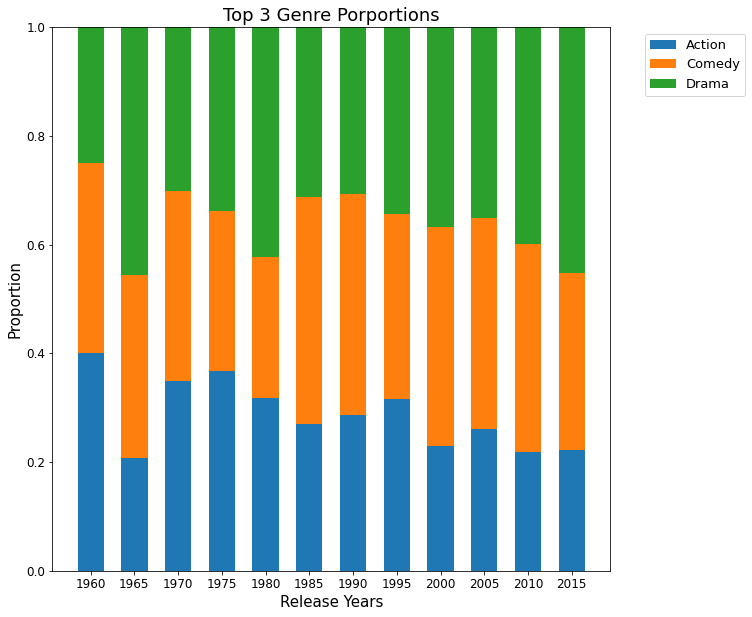

In [30]:
### Displaying the Propotions in stacked vertical bar charts to see the development of the 3 top genres

labels = df_best_gen.index.get_level_values(1).year.unique()
prop_genre = list()
width = 3
fig, ax = plt.subplots(figsize=(10,10))
ax.set_ylim([0,1])

for best_gen in best_genres_overall:
    
    if best_gen == best_genres_overall[0]:
        prop_genre_bot = df_props_pa.loc[best_gen].values.reshape(len(labels),)
        ax.bar(x=labels, height= prop_genre_bot,width=width, label= best_gen)
    else:
        prop_genre = df_props_pa.loc[best_gen].values.reshape(len(labels),)
        ax.bar(x=labels, height= prop_genre,width=width, label= best_gen, bottom=prop_genre_bot)
        prop_genre_bot = prop_genre + prop_genre_bot
      
ax.set_xlabel('Release Years', fontsize=15)
ax.set_ylabel('Proportion', fontsize=15)
ax.set_title('Top 3 Genre Porportions', fontsize=18)
plt.xticks(np.arange(min(labels), max(labels)+1, 5.0))
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=13);

This visualization clarifies the distributions of the movie genres from 1690 to 2015. It only show proportions of this 3 genres excluding the other genres!

### Question 2: What's the characteristics of a popular movie?

In [31]:
### First make a copy a the mainframe
df_popular = df.copy()

In [32]:
### Get statistical insight of the popularity column
df_popular.describe()['popularity']

count    10800.000000
mean         0.649455
std          1.002441
min          0.000188
25%          0.209157
50%          0.385471
75%          0.717508
max         32.985763
Name: popularity, dtype: float64

In [33]:
### counting the unique popularity values
df_popular['popularity'].nunique()

10750

In [34]:
### For a better unterstanding classify the popularity in popular levels cause there are too many unique values
# using the statistical values to set the edges. All movies over popularity over 10 are famous

bin_names= ['Unknown', 'Less-Popular', 'Mid-Popular', 'Popular', 'Famous']
bin_edges= [0.000188, 0.209157, 0.385471, 0.717508,10, 32.985763]

df_popular['popular_level'] = pd.cut(df_popular['popularity'], bin_edges, labels= bin_names)
df_popular.drop(columns='id', inplace=True)


In [35]:
df_popular.head()

,popularity,budget,revenue,original_title,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,popular_level
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015-01-01,1.379999e+08,1.392446e+09,Famous
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015-01-01,1.379999e+08,3.481613e+08,Famous
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015-01-01,1.012000e+08,2.716190e+08,Famous
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015-01-01,1.839999e+08,1.902723e+09,Famous
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2947,7.3,2015-01-01,1.747999e+08,1.385749e+09,Popular


In [44]:
df_popular['popular_level'].value_counts()

Mid-Popular     2700
Less-Popular    2700
Unknown         2699
Popular         2689
Famous            11
Name: popular_level, dtype: int64

In [36]:
### Calculating the mean for each popular level
pop_level_means = df_popular.groupby('popular_level').mean()

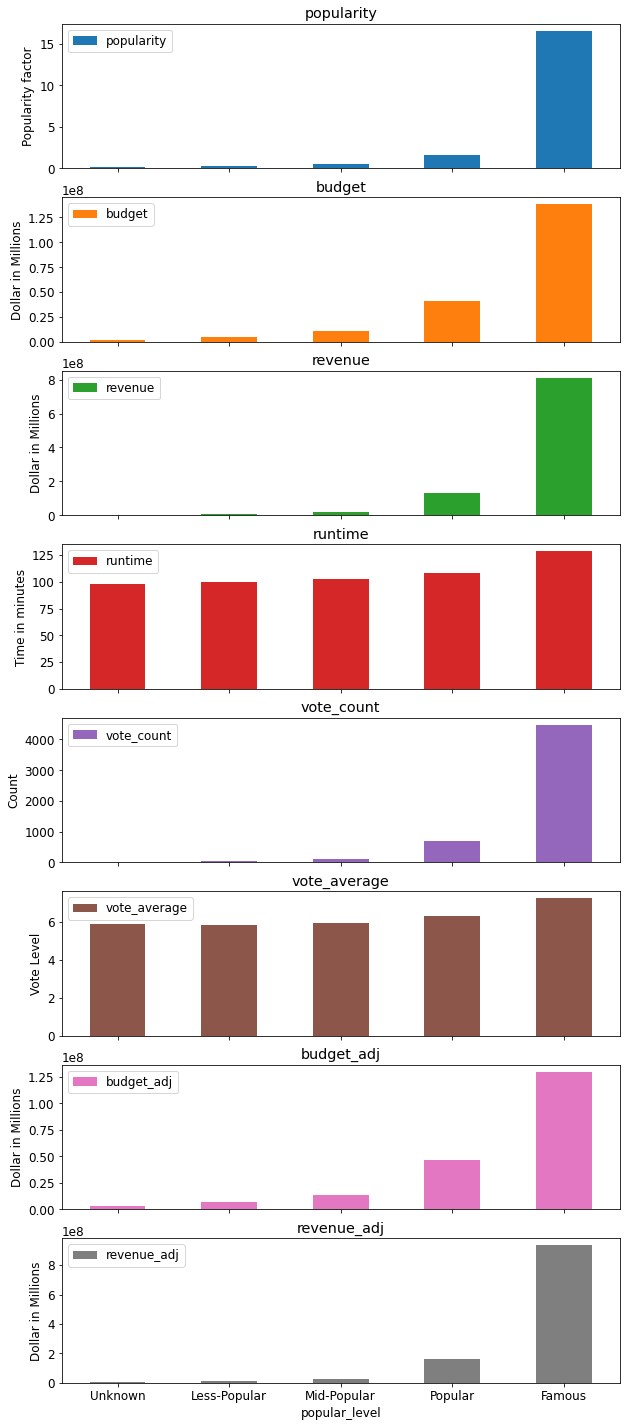

In [43]:
### FAST CHECK of the distribution of each popular level to different columns
axes = pop_level_means.plot.bar(rot=0,figsize=(10,25),subplots=True)
plt.legend(loc='upper left')

axes[0].set_ylabel('Popularity factor')
axes[1].set_ylabel('Dollar in Millions')
axes[2].set_ylabel('Dollar in Millions')
axes[3].set_ylabel('Time in minutes')
axes[4].set_ylabel('Count')
axes[5].set_ylabel('Vote Level')
axes[6].set_ylabel('Dollar in Millions')
axes[7].set_ylabel('Dollar in Millions');

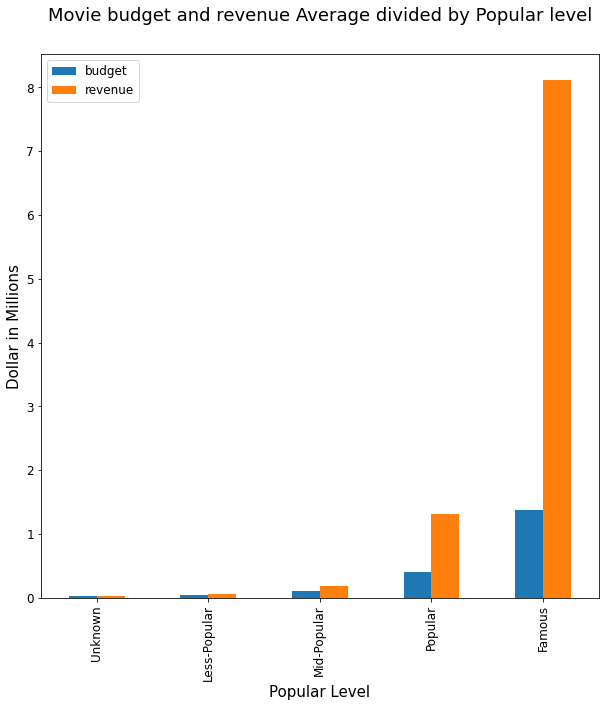

In [40]:
### Specific Visualization of different characteristics
# Budget and revenue average to popular level

ax = (pop_level_means[['budget','revenue']]/1e8).plot.bar(figsize=(10,10))
plt.title('Movie budget and revenue Average divided by Popular level', fontsize=18, y=1.05)
ax.set_xlabel('Popular Level', fontsize=15)
ax.set_ylabel('Dollar in Millions', fontsize=15);

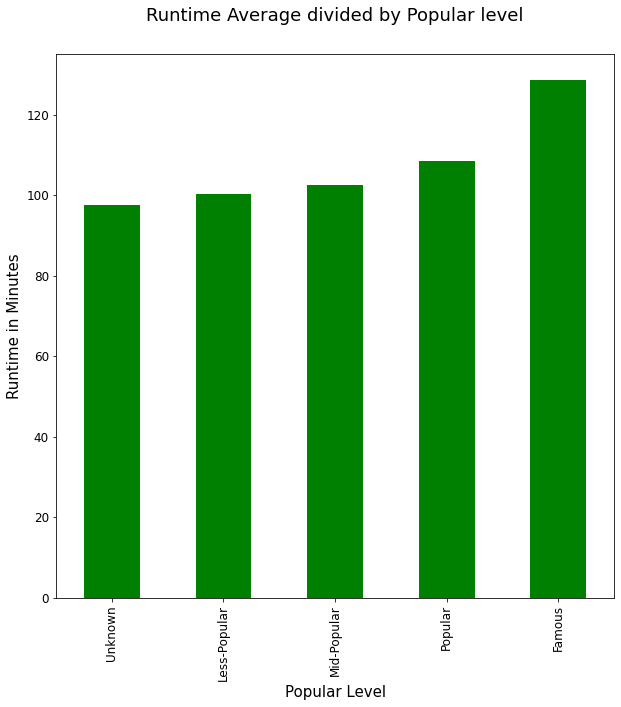

In [41]:
### Runtime AVerage to Popular level

ax = pop_level_means[['runtime']].plot.bar(figsize=(10,10), color='green')
plt.title('Runtime Average divided by Popular level', fontsize=18, y=1.05)
ax.set_xlabel('Popular Level', fontsize=15)
ax.set_ylabel('Runtime in Minutes', fontsize=15)
ax.get_legend().remove();

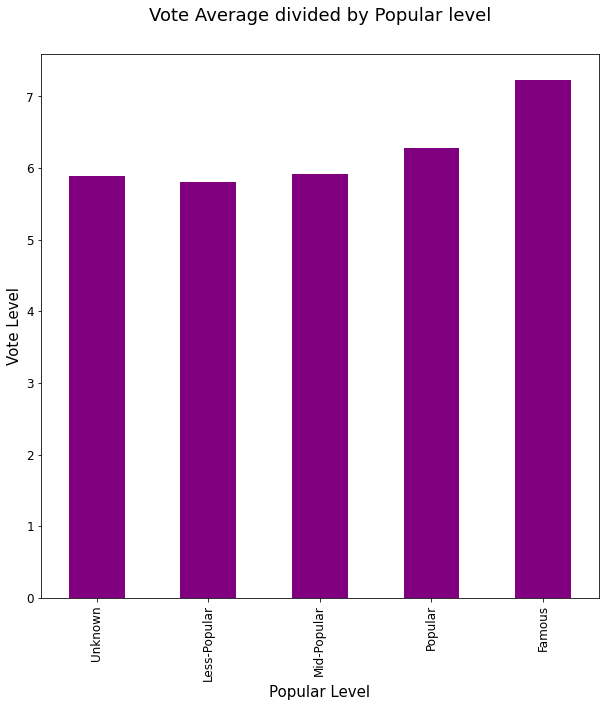

In [42]:
### Vote Average to Popular level

ax = pop_level_means[['vote_average']].plot.bar(figsize=(10,10), color='purple')
plt.title('Vote Average divided by Popular level', fontsize=18, y=1.05)
ax.set_xlabel('Popular Level', fontsize=15)
ax.set_ylabel('Vote Level', fontsize=15)
ax.get_legend().remove();

<a id='conclusions'></a>
## Conclusions

###### Question 1: Which Genres are popular overall between 1960- 2015?
The most produced movies are drama, comedy and action movies. Over the years drama and comedy movies are more produced than action movies. For further investigation it's maybe interesting to look if drama and comedy movies are popular and high rated.

###### Question 2: What's the characteristics of a popular movie?
Popular Movies usually have a higher budget than unknown movies. Probably cause they use better effects and popular casts(suggestion). As expected a famous movie has a much higher revenue as less popular movies. So teh profit is usually much better than less popular films.
In average a famous movie has a longer runtime. The vote level is also higher for famous movies.


##### Limitations:
There are only 11 famous movies(popularity>10), not enough for a meaningful investigation. The values of the famous popular level show the expected development but isn't well founded.